<a href="https://colab.research.google.com/github/KanumoluSupriya/EDA-project/blob/main/Edapro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("/content/vehicle_sales_dirty.csv")
df

,Car_ID,Brand,Model_Year,Fuel_Type,Transmission,Seller_Type,Owner,Driven_KMs,Engine_CC,Mileage_kmpl,Selling_Price,Present_Price,Brand_dup,Selling_Price_dup
0,136,Mahindra,2019,diesel,Manual,dealer,First,149797,1547,27.47,2468431.0,328799,Mahindra,2468431.0
1,172,ford,2007,Diesel,auto,Individual,Second,198712,1085,28.03,190619.0,510679,ford,190619.0
2,223,Toyota,2012,diesel,manual,Individual,Third,177021,3005,18.80,563201.0,2848833,Toyota,563201.0
3,73,Honda,2002,NaN,Automatic,Dealer,First,54828,1640,27.58,2271388.0,1459276,Honda,2271388.0
4,152,Tata,2010,diesel,Manual,Dealer,NaN,128515,2281,25.85,1806288.0,1720392,Tata,1806288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,77,Toyota,2014,Hybrid,auto,Dealer,Second,137252,1644,12.43,679796.0,2470387,Toyota,679796.0
281,104,Mercedes,2004,diesel,Automatic,Individual,Third,128428,3129,22.36,686338.0,2044183,Mercedes,686338.0
282,195,Toyota,2018,Electric,NaN,Dealer,3rd,139250,3145,13.26,2409904.0,2883890,Toyota,2409904.0
283,66,ford,2000,Diesel,auto,Individual,2nd,79217,1928,17.52,1423317.0,449891,ford,1423317.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             285 non-null    int64  
 1   Brand              263 non-null    object 
 2   Model_Year         285 non-null    int64  
 3   Fuel_Type          223 non-null    object 
 4   Transmission       204 non-null    object 
 5   Seller_Type        285 non-null    object 
 6   Owner              251 non-null    object 
 7   Driven_KMs         285 non-null    int64  
 8   Engine_CC          285 non-null    int64  
 9   Mileage_kmpl       285 non-null    float64
 10  Selling_Price      262 non-null    float64
 11  Present_Price      285 non-null    int64  
 12  Brand_dup          263 non-null    object 
 13  Selling_Price_dup  262 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 31.3+ KB


In [6]:
df.isnull().sum()

,0
Car_ID,0
Brand,22
Model_Year,0
Fuel_Type,62
Transmission,81
Seller_Type,0
Owner,34
Driven_KMs,0
Engine_CC,0
Mileage_kmpl,0


In [7]:
df.drop(columns = ["Brand_dup","Selling_Price_dup"],axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          263 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      223 non-null    object 
 4   Transmission   204 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          251 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  262 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [8]:
df["Brand"] = df["Brand"].ffill()
df["Fuel_Type"] = df["Fuel_Type"].ffill()
df["Transmission"] = df["Transmission"].bfill()
df["Owner"] = df["Owner"].bfill()
df["Selling_Price"] = df["Selling_Price"].fillna(df["Selling_Price"].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [9]:
df["Brand"].unique()

array(['Mahindra', 'ford', 'Toyota', 'Honda', 'Tata', 'BMW', 'Ford',
       'toyota', 'Hyundai', 'Suzuki', 'Mercedes'], dtype=object)

In [10]:
df["Brand"].replace(["toyota"],["Toyota"], inplace = True)
df["Brand"].replace(["ford"],["Ford"], inplace = True)
df["Brand"].unique()

/tmp/ipython-input-541846950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Brand"].replace(["toyota"],["Toyota"], inplace = True)


array(['Mahindra', 'Ford', 'Toyota', 'Honda', 'Tata', 'BMW', 'Hyundai',
       'Suzuki', 'Mercedes'], dtype=object)

In [11]:
df["Fuel_Type"].unique()

array(['diesel', 'Diesel', 'Electric', 'petrol', 'Hybrid', 'Petrol'],
      dtype=object)

In [12]:
df["Fuel_Type"].replace(["diesel"],["Diesel"], inplace = True)
df["Fuel_Type"].replace(["petrol"],["Petrol"], inplace = True)
df["Fuel_Type"].unique()

/tmp/ipython-input-216288674.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fuel_Type"].replace(["diesel"],["Diesel"], inplace = True)


array(['Diesel', 'Electric', 'Petrol', 'Hybrid'], dtype=object)

In [13]:
df["Transmission"].unique()

array(['Manual', 'auto', 'manual', 'Automatic'], dtype=object)

In [14]:
df["Transmission"].replace(["auto"],["Automatic"], inplace = True)
df["Transmission"].replace(["manual"],["Manual"], inplace = True)
df["Transmission"].unique()

/tmp/ipython-input-3404533262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Transmission"].replace(["auto"],["Automatic"], inplace = True)


array(['Manual', 'Automatic'], dtype=object)

In [15]:
df["Seller_Type"].unique()

array(['dealer', 'Individual', 'Dealer', 'individual'], dtype=object)

In [16]:
df["Seller_Type"].replace(["dealer"],["Dealer"], inplace = True)
df["Seller_Type"].replace(["individual"],["Individual"], inplace = True)
df["Seller_Type"].unique()

/tmp/ipython-input-2727072316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Seller_Type"].replace(["dealer"],["Dealer"], inplace = True)


array(['Dealer', 'Individual'], dtype=object)

In [17]:
df["Owner"].unique()

array(['First', 'Second', 'Third', '2nd', '1st', '3rd'], dtype=object)

In [18]:
df["Owner"].replace(["1st"],["First"], inplace = True)
df["Owner"].replace(["2nd"],["Second"], inplace = True)
df["Owner"].replace(["3rd"],["Third"], inplace = True)
df["Owner"].unique()

/tmp/ipython-input-1128367517.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Owner"].replace(["1st"],["First"], inplace = True)


array(['First', 'Second', 'Third'], dtype=object)

In [19]:
df["Car_ID"].unique()

array([136, 172, 223,  73, 152, 115, 276,  87,   9, 229, 238, 237,  48,
       247, 124, 186, 100, 174, 159,  49, 168,  53, 154,  83,  97, 244,
       240, 200,  71,  78, 263,  40, 196,  68, 151, 125, 275, 178, 157,
       173,  99, 202, 193, 215, 145,   3,  85, 255,  38, 150, 273, 259,
        67, 153, 268, 252, 166, 198, 231,  79,  43, 111,   7, 236, 204,
        31, 239,  82,  29, 249,  59, 180, 264,  27, 122, 203, 265,  23,
       163, 256, 114, 199,  70, 250, 208, 127,  15, 245,  44, 184, 226,
       175,  35, 242, 187,  90,  86,  98, 211, 243, 161,  16, 105, 194,
        13, 179, 190, 102, 183,   6, 253,  45, 219,  52, 280,  18, 274,
        47, 116,   1, 206, 254, 131, 197, 216,  76, 103,  89,  21, 266,
       141,  92,   8, 214, 148, 137, 144,   4, 222,  24, 155, 133,   5,
        20, 147,  88,  55,  63, 113, 234, 241, 143,  26, 220,  32, 248,
       121, 101,  22,  81,  60,  30, 232, 167, 257,  62,  36,  61, 212,
        74,  51, 230, 182, 132,  28, 164, 160, 118, 110, 134, 14

In [20]:
df["Model_Year"].unique()

array([2019, 2007, 2012, 2002, 2010, 2020, 2005, 2016, 2000, 2014, 2009,
       2015, 2001, 2006, 2021, 2013, 2017, 2008, 2018, 2022, 2004, 2011,
       2003])

In [21]:
df["Driven_KMs"].unique()

array([149797, 198712, 177021,  54828, 128515,  64546, 176262,  85862,
       141167, 143458, 181890, 159199, 117481, 171375, 121869, 154640,
       185876, 192999,  82459,  71767,  72285, 137524, 102183,  47452,
       182305,  23386,  54809, 132863, 178818, 101049, 195121,  12264,
        52675,  56371,  24486, 119613,  44223,  57789,   6942, 160547,
        29697, 183323, 164869, 109306,  28071, 192386, 122222,  81877,
        59918, 146779, 150314,  52262,  11354,  89438, 169100, 165841,
       198978, 109674,  77202, 126730,   5635, 145050,  76756, 130759,
       190716,  63224,   6047,  97921, 192005,  29630,  16966,  42972,
        16917, 147548, 119272,   8184,  81337,  14350,   8318, 114465,
        44174, 106242,  95115, 128582,  61907, 149865,  90806,  51657,
       156523, 110781,  88194,  57028,   8049,  25500,  47021, 148824,
        48881,  80628,  35669, 120413, 122809, 120144,  25524,  25948,
       181206,  20907, 167739,  97363, 195765, 151918,  30898, 178181,
      

In [22]:
df["Engine_CC"].unique()

array([1547, 1085, 3005, 1640, 2281,  956,  837, 1050, 1919, 3301, 3454,
       2061, 2158, 1822, 1621, 2502, 2976, 2859, 2122, 1813, 1170,  869,
       2058, 1674, 3298, 2001, 1906, 2990, 3138, 2846, 2945, 2341, 2397,
       2168, 2735, 2346, 3339, 3133, 1156, 1580, 2717, 1939, 2280, 2017,
       1596, 1213, 3132, 2358, 2357, 2141, 1147, 1563, 1595, 2404, 2719,
       1261, 2723, 1908, 1009, 1518, 1993, 2854, 1539,  835, 2702, 3234,
       1005, 2186,  987, 1943, 2208, 1478, 3134, 1227, 1258, 1740, 2310,
       3426,  847, 2929, 3057, 2938, 1138, 2833, 2708, 2000, 1256, 2525,
       3115, 1677, 3061, 1572, 1762, 3270, 2647, 1054,  982, 1149, 1018,
       1434, 1165, 3000, 2670, 3007, 2595, 3136, 1739, 2088, 1898, 3093,
       2270, 2848, 3025, 1728, 2099, 3149, 2285, 2904, 1692, 3049, 1157,
       1334, 2726, 1189, 2759, 1463,  807, 2375, 2392, 2979, 2496, 1671,
       2590, 2545, 2454, 2664, 1335, 2535, 1659,  866, 1172, 2289, 3233,
        829,  876, 1423, 2405, 2396, 1096, 1768, 15

In [23]:
df["Mileage_kmpl"].unique()

array([27.47, 28.03, 18.8 , 27.58, 25.85, 19.21, 18.36, 11.8 , 28.6 ,
       16.85, 13.  , 26.06, 26.16, 29.74, 27.3 , 24.41, 27.48, 17.78,
       15.22, 18.42, 20.9 , 24.9 , 20.59, 25.37, 21.93, 23.05, 28.21,
       20.72, 17.47, 21.59, 23.44, 25.93, 27.24, 19.77, 11.97, 14.49,
       13.57, 24.63, 11.  , 12.73, 15.64, 12.07, 12.53, 15.8 , 16.1 ,
       15.91, 13.44, 27.93, 28.29, 26.81, 26.12, 27.9 , 28.45, 25.3 ,
       25.45, 26.94, 13.28, 11.26, 12.86, 27.96, 24.66, 28.73, 15.96,
       11.02, 29.15, 12.91, 23.5 , 26.58, 13.74, 13.84, 26.54, 28.06,
       20.48, 14.81, 29.93, 12.14, 28.81, 16.72, 27.6 , 14.03, 11.44,
       18.91, 29.08, 16.2 , 16.73, 23.46, 27.31, 26.08, 26.31, 14.66,
       14.27, 18.55, 14.48, 16.14, 12.12, 11.05, 24.07, 22.31, 19.85,
       13.04, 20.45, 11.99, 20.18, 16.21, 22.56, 28.79, 22.71, 11.35,
       24.8 , 13.48, 21.52, 10.95, 29.84, 28.22, 10.12, 28.23, 10.37,
       29.01, 13.4 , 18.29, 18.82, 22.35, 16.82, 10.59, 29.21, 14.69,
       20.27, 19.65,

In [24]:
df["Selling_Price"].unique()

array([2468431.,  190619.,  563201., 2271388., 1806288., 1309821.,
        987565.,  680462., 1566368., 2231659.,  826034., 2131225.,
       2227513., 2383184.,  598421.,  833271., 1238902., 1195453.,
       1247611.,  174963., 2483143., 1235539., 1518274., 2193520.,
       2071860., 1160774., 2320394., 1292885., 1526067., 2074499.,
       1423929.,  877130., 2418483.,  115985., 2484356., 1007853.,
        726833.,  181469., 1178087., 1043503.,  304663., 1009798.,
       2274092., 1769697.,  241037., 1137934., 1957665., 1774728.,
       1952860., 1880643., 1530762.,  153430., 2243313.,  272102.,
       1322137., 1652229.,  331973., 1427608.,  754824., 2401832.,
       2331283., 1703716.,  879103., 1120067.,  950651., 1894596.,
        676567.,  232229., 1476364., 1211069.,  857680.,  191494.,
        112133., 1978006., 1349691., 2392084.,  965666., 2447089.,
       1757872., 2168079., 1360054., 1491735., 1158835., 1533048.,
        810759.,  825526., 1802860., 1121951., 1413272., 10989

In [25]:
df["Present_Price"].unique()

array([ 328799,  510679, 2848833, 1459276, 1720392, 2201792, 2331417,
       2777191,  758786,  454680, 2745655, 2939187, 1388776, 2077438,
       2264249, 1840895, 2130669, 1192971,  356506, 1527400,  498604,
       2496001, 1410252,  847077,  838691, 1619020,  661242,  472471,
        298295, 1603674, 1362387, 2483081, 1327214, 1022054,  793575,
        372376, 2530543, 2698171, 1177267, 1555897, 2629635,  874643,
        978002, 2401931, 2193768, 2295190, 1711014, 2044909, 1301915,
        329790, 2849483, 1715980, 2295474, 1709133, 1610361, 2439589,
       2605873,  472212, 2150488, 2725887, 2500082, 2530123, 1805405,
       1094634, 2859509, 2650788, 2008926, 1952787,  217913, 2104594,
        749357, 1422611, 1451971,  842065, 2608379, 1483914, 2943683,
       2673401,  386882, 1878262, 2024775,  399456, 2832795, 2283066,
        972771, 1743773, 2570479,  292380,  375683, 2504933, 2461494,
       2833528, 2292807, 1152202, 1909640, 1430711, 2371817, 1701698,
       2701758,  681

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [27]:
df.isnull().sum()

,0
Car_ID,0
Brand,0
Model_Year,0
Fuel_Type,0
Transmission,0
Seller_Type,0
Owner,0
Driven_KMs,0
Engine_CC,0
Mileage_kmpl,0


In [28]:
df.to_csv("vehicle_sales_cleaned.csv", index=False)
from google.colab import files
files.download("vehicle_sales_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
clean_df = pd.read_csv("/content/vehicle_sales_cleaned.csv")
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


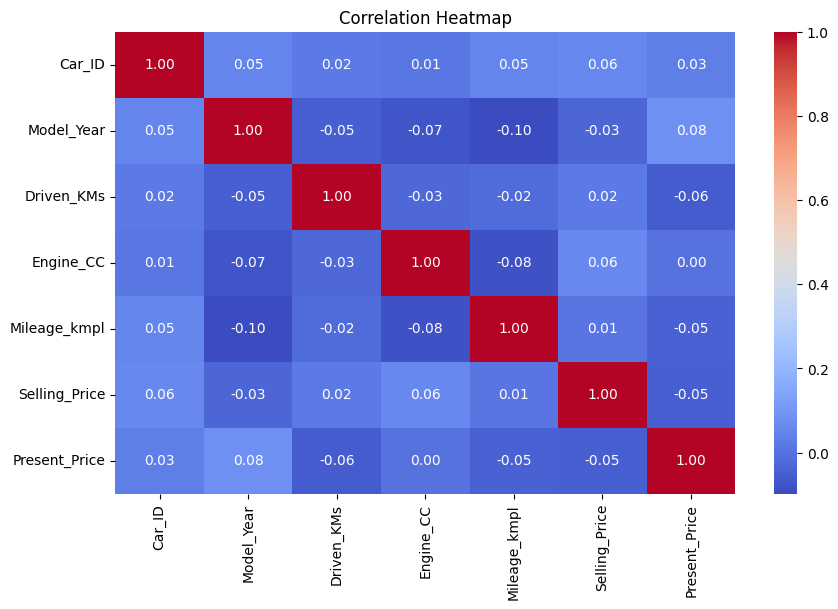

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = clean_df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

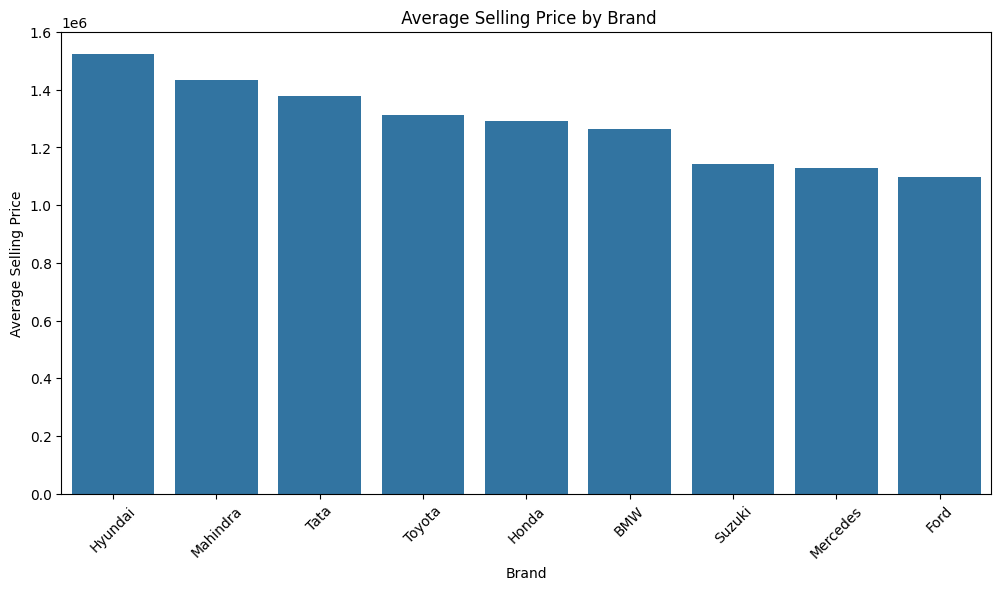

In [31]:
plt.figure(figsize=(12,6))
brand_price = df.groupby('Brand')['Selling_Price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.index, y=brand_price.values)
plt.xticks(rotation=45)
plt.title(" Average Selling Price by Brand")
plt.ylabel("Average Selling Price")
plt.xlabel("Brand")
plt.show()

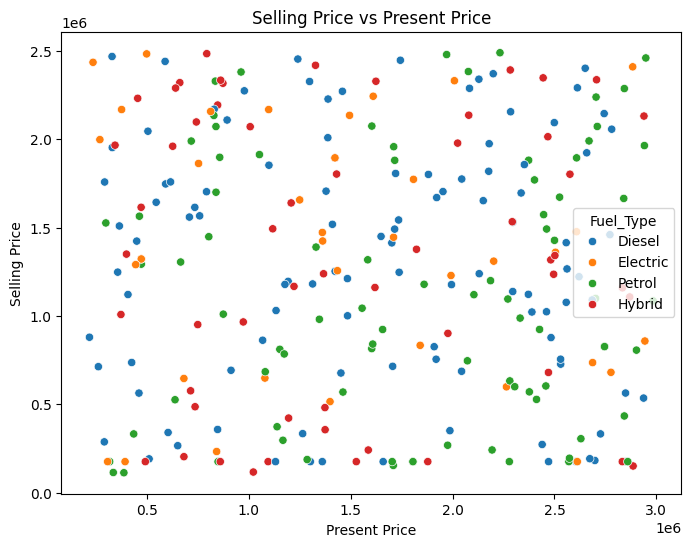

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Present_Price', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

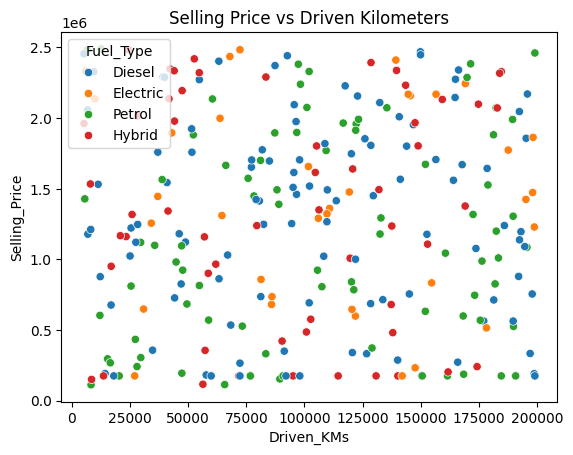

In [33]:
sns.scatterplot(x='Driven_KMs', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title("Selling Price vs Driven Kilometers")
plt.show()

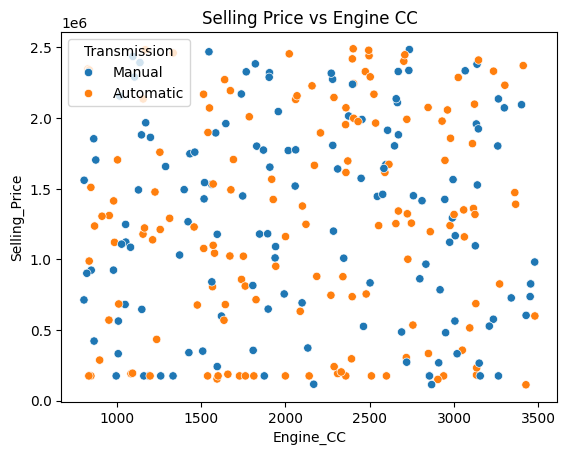

In [34]:
sns.scatterplot(x='Engine_CC', y='Selling_Price', hue='Transmission', data=df)
plt.title("Selling Price vs Engine CC")
plt.show()

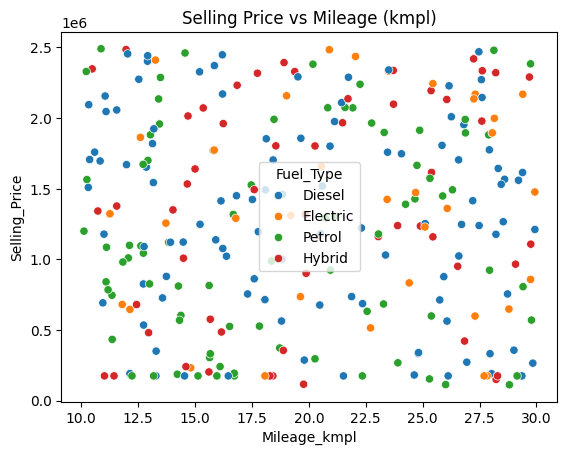

In [35]:
sns.scatterplot(x='Mileage_kmpl', y='Selling_Price', hue='Fuel_Type', data=df)
plt.title("Selling Price vs Mileage (kmpl)")
plt.show()

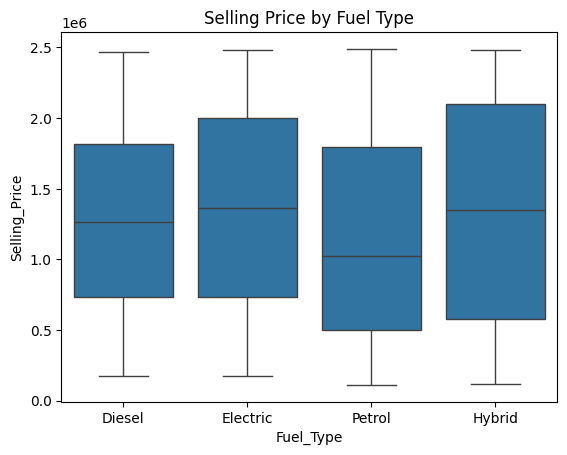

In [36]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Fuel Type")
plt.show()

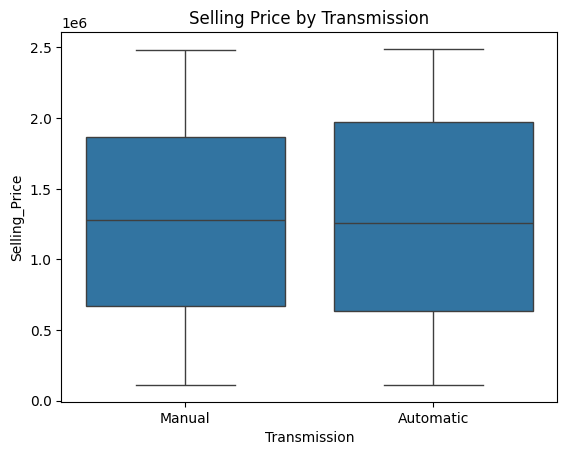

In [37]:
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price by Transmission")
plt.show()

<Axes: xlabel='Owner', ylabel='Selling_Price'>

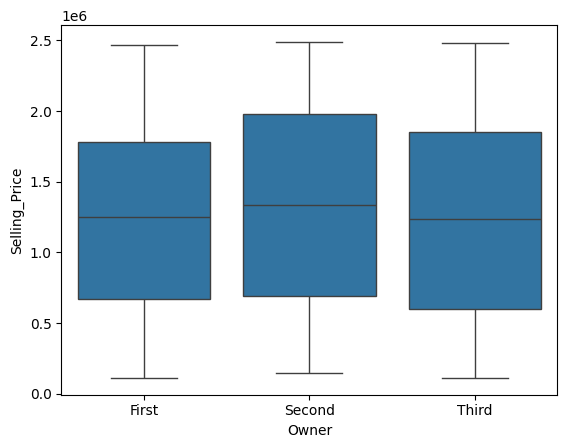

In [38]:
sns.boxplot(x='Owner', y='Selling_Price', data=df)

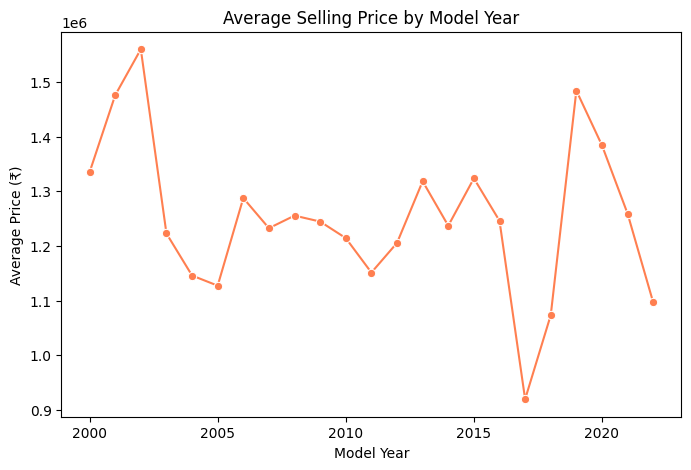

In [39]:
yearly = df.groupby('Model_Year')['Selling_Price'].mean()
plt.figure(figsize=(8,5))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color='coral')
plt.title("Average Selling Price by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Average Price (₹)")
plt.show()

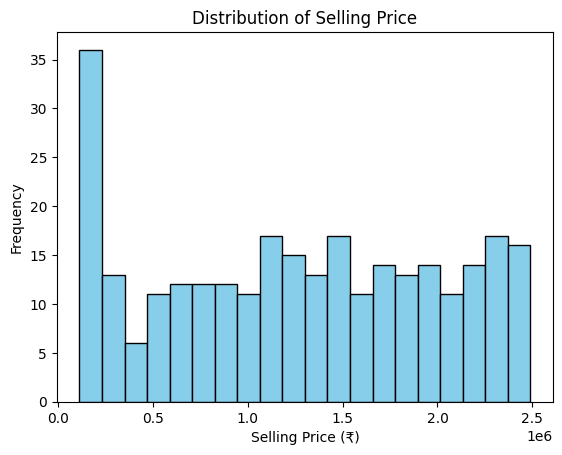

In [40]:
df['Selling_Price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (₹)")
plt.show()

**Overall analysis:**

Selling price mainly depends on present price, model year, engine size, and kilometers driven.

Premium brands, diesel cars, and automatic transmission vehicles have higher resale value.

Older and high-mileage cars show a clear drop in selling price.

Newer, high-end, and well-maintained cars retain the best resale value.